# 1D

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'font.size': 26,
                     'mathtext.fontset' : 'stix',
                     'font.family' : 'STIXGeneral'
                     })

In [3]:
N = 2**18
Ltot = 1.
dx = Ltot/N
sqdx = np.sqrt(dx)
H = 1./3.
X = np.fft.fftfreq(N) * Ltot
K  = np.fft.fftfreq(N) * N / Ltot
PH = np.power( K*K + 1 , -.5*H-.25)

In [4]:
U2 = np.loadtxt("FGF1D_Out.dat", comments="#")

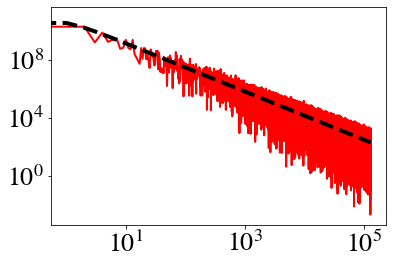

In [5]:
# power spectrum
psp2 = np.abs( np.fft.fft(U2) )**2
plt.plot( K[:N//2], psp2[:N//2], color='r', linewidth=2 )
plt.plot( K[:N//2], N*N*np.power(K*K+1.,-H-.5)[:N//2], linestyle='--' , color='k', linewidth=4)
plt.yscale('log')
plt.xscale('log')
plt.show()

In [6]:
from scipy.special import gamma as gamma

In [7]:
# second order structure function
sf2 = np.empty(N)
for ell in np.arange(N):
    sf2[ell] = np.mean( np.abs( np.roll(U2,ell) - U2 )**2 )

In [8]:
c2  = -np.power(2.,2.+2.*H) * np.power(np.pi,2*H) * np.cos(np.pi*H) * gamma(-2.*H)
var = np.sqrt(2)*gamma(H)/gamma(H+.5)

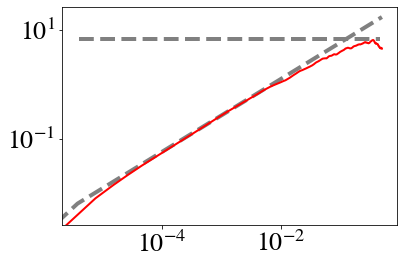

In [9]:
plt.plot( X[:N//2], c2*np.power(X[:N//2],2*H), linestyle='--' , color='gray', linewidth=4)
plt.axhline(y=2*var, xmin=0.05, xmax=0.95, color='gray', linewidth=4, linestyle='dashed')
#plt.plot( X[:N//2], .3e-5*np.power(X[:N//2],2*H), linestyle='--' , color='k', linewidth=4)
#plt.plot( X[:N//2], sf1[:N//2], color='b', linewidth=2 )
plt.plot( X[:N//2], sf2[:N//2], color='r', linewidth=2 )
plt.yscale('log')
plt.xscale('log')
plt.show()

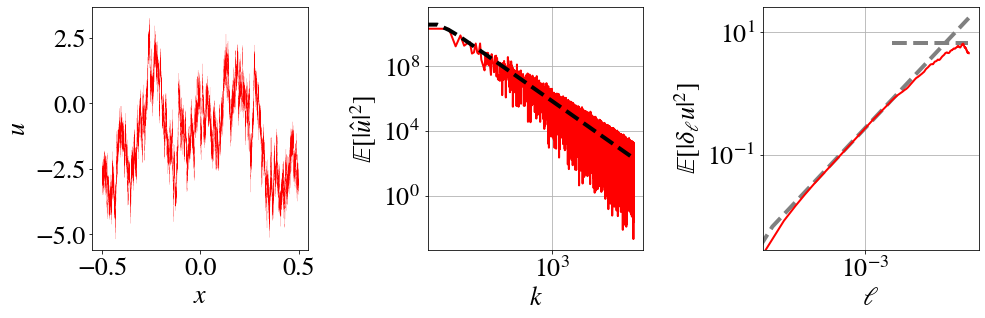

In [19]:
fig, axs = plt.subplots(1,3,figsize=(14,5))

axs[0].plot(np.fft.fftshift(X), np.fft.fftshift(U2), color='r', linewidth=.1)
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r'$u$')

# power spectrum
axs[1].plot( K[:N//2], psp2[:N//2], color='r', linewidth=2 )
axs[1].plot( K[:N//2], N*N*np.power(K*K+1.,-H-.5)[:N//2], linestyle='--' , color='k', linewidth=4)
axs[1].grid(True)
axs[1].set_xlabel(r'$k$')
axs[1].set_ylabel(r'$\mathbb{E}[|\hat u|^2]$')
axs[1].set_yscale('log')
axs[1].set_xscale('log')

axs[2].plot( X[:N//2], c2*np.power(X[:N//2],2*H), linestyle='--' , color='gray', linewidth=4)
axs[2].axhline(y=2*var, xmin=0.6, xmax=0.95, color='gray', linewidth=4, linestyle='dashed')
axs[2].plot( X[:N//2], sf2[:N//2], color='r', linewidth=2 )
axs[2].grid(True)
axs[2].set_xlabel(r'$\ell$')
axs[2].set_ylabel(r'$\mathbb{E}[|\delta_{\ell} u|^2]$')
axs[2].set_yscale('log')
axs[2].set_xscale('log')

plt.tight_layout()
plt.savefig("fgf1d.png")
plt.show()

In 1D, we have

$$
\mathbb{E}(\delta_{\ell} u)^2 \underset{\ell \to 0}{\sim} |\ell|^{2H} \int_{\mathbb{R}} dk \, \frac{|e^{2\pi i k}-1|^2}{|k|^{2H+1}}
$$

and the integral is equal to

$$
c_2 = \int_{\mathbb{R}} dk \, \frac{|e^{2\pi i k}-1|^2}{|k|^{2H+1}} = -2^{2+2H} \pi^{2H} \cos(\pi H) \Gamma(-2H)
$$

in higher dimensions

$$
c_2 = \int_{\mathbb{R}^d} d^d k \, \frac{|e^{2\pi i k \cdot e_1}-1|^2}{|k|^{2H+d}}
$$

in 2D

$$
c_2 = -\frac{2 \pi ^{2 H+1} \Gamma (-H)}{\Gamma (H+1)}
$$

# 2D

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
plt.rcParams.update({'font.size': 26,
                     'mathtext.fontset' : 'stix',
                     'font.family' : 'STIXGeneral'
                     })

In [13]:
dim = 2
N = 2**9
Ltot = 1.
dx = Ltot/N
sqdx = np.sqrt(dx)
H = 1./3.
X = np.fft.fftfreq(N) * Ltot
K  = np.fft.fftfreq(N) * N / Ltot

In [14]:
U2 = np.loadtxt("FGF2D_Out.dat", comments="#").reshape(N,N)

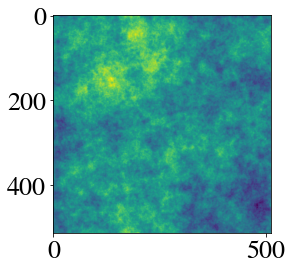

In [15]:
# Visualization of the random field
plt.imshow(U2)
plt.show()

2D spectrum is

$$
E(k) = \int \widehat{C}\left(\vec k\right) dS(k)
$$

where $dS(k)$ is the surface integration element at distance $k$. In 2D, this is $dS(k) = k d\theta$

hence

$$
E_{2D}(k) = 2\pi |k|^{-2H}
$$

In [16]:
# those extra powers of 2 might be because the 2D IFFT is not normalized
# i haven't checked

In [17]:
KPairs = np.array([[ np.sqrt(ki**2 + kj**2) for ki in K ] for kj in K ])

In [18]:
KVals = np.unique(KPairs)

In [19]:
KCount = np.array( [np.count_nonzero(KPairs == k) for k in KVals ] )

In [20]:
KIndex = np.array( [[ np.where( KVals == KPairs[i,j] )[0][0] for i in range(N)] for j in range(N)])

In [21]:
Spec = np.zeros_like(KVals)

In [22]:
UF = np.fft.fft2(U2)

In [23]:
for i in range(N):
    for j in range(N):
        Spec[KIndex[i,j]] += KVals[KIndex[i,j]] * np.abs(UF[i,j])**2
        
for i in range(len(Spec)):
    Spec[i] = 2. * np.pi * Spec[i] / KCount[i] / N**(2*dim)

In [24]:
del UF

$$
E = \int \hat{C}(\vec k) dS(k)
$$

$$
E_{2D} = \int k d\theta \, \hat C(\vec k)
$$

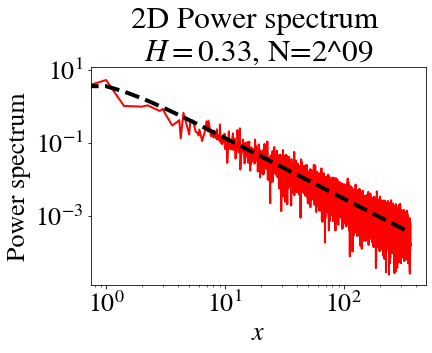

In [25]:
# power spectrum
#plt.plot( K[:N//2], psp1[:N//2], color='b', linewidth=2 )
c2D = 2.*np.pi
plt.plot( KVals, Spec, color='r', linewidth=2 )
plt.plot( KVals, c2D * np.power(KVals*KVals+1.,-H-.5), linestyle='--' , color='k', linewidth=4)
plt.title('2D Power spectrum \n'+'$H={:.2f}$, N=2^{:02d}'.format(H,int(np.log2(N))))
plt.ylabel(r'Power spectrum')
plt.xlabel(r'$x$')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [26]:
from scipy.special import gamma as gamma

In [27]:
# second order structure function
sf2 = np.empty(N)
for ell in np.arange(N):
    sf2[ell] = np.mean( np.abs( np.roll(U2,ell,axis=0) - U2 )**2 )

In [28]:
c2  = -2.*np.power(np.pi,2.*H+1.) * gamma(-H)/gamma(H+1)
var = np.pi/H

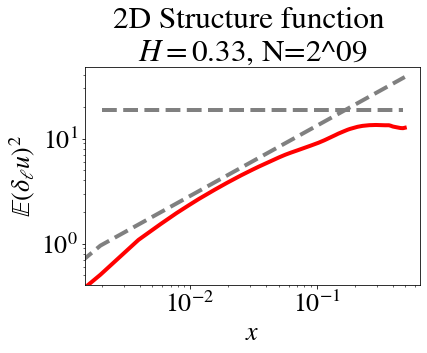

In [29]:
plt.plot( X[:N//2], c2*np.power(X[:N//2],2*H), linestyle='--' , color='gray', linewidth=4)
plt.axhline(y=2*var, xmin=0.05, xmax=0.95, color='gray', linewidth=4, linestyle='dashed')
plt.plot( X[:N//2], sf2[:N//2], color='r', linewidth=4 )
#plt.plot( X[:N//2], sf1[:N//2], color='b', linewidth=2 )
plt.title('2D Structure function \n'+'$H={:.2f}$, N=2^{:02d}'.format(H,int(np.log2(N))))
plt.ylabel(r'$\mathbb{E}(\delta_{\ell} u)^2$')
plt.xlabel(r'$x$')
plt.yscale('log')
plt.xscale('log')
plt.show()

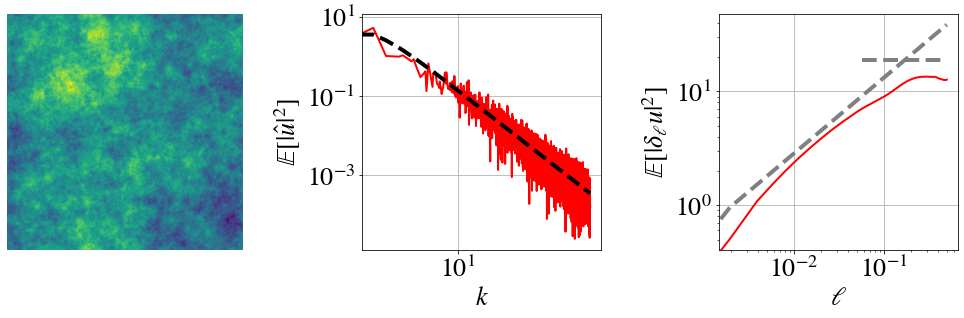

In [30]:
fig, axs = plt.subplots(1,3,figsize=(14,5))

axs[0].imshow(np.real(U2))
axs[0].axis('off')

# power spectrum
axs[1].plot( KVals, Spec, color='r', linewidth=2 )
axs[1].plot( KVals, c2D * np.power(KVals*KVals+1.,-H-.5), linestyle='--' , color='k', linewidth=4)
axs[1].grid(True)
axs[1].set_xlabel(r'$k$')
axs[1].set_ylabel(r'$\mathbb{E}[|\hat u|^2]$')
axs[1].set_yscale('log')
axs[1].set_xscale('log')

axs[2].plot( X[:N//2], c2*np.power(X[:N//2],2*H), linestyle='--' , color='gray', linewidth=4)
axs[2].axhline(y=2*var, xmin=0.6, xmax=0.95, color='gray', linewidth=4, linestyle='dashed')
axs[2].plot( X[:N//2], sf2[:N//2], color='r', linewidth=2 )
axs[2].grid(True)
axs[2].set_xlabel(r'$\ell$')
axs[2].set_ylabel(r'$\mathbb{E}[|\delta_{\ell} u|^2]$')
axs[2].set_yscale('log')
axs[2].set_xscale('log')

plt.tight_layout()
plt.savefig("fgf2d.png")
plt.show()

# 3D

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'font.size': 26,
                     'mathtext.fontset' : 'stix',
                     'font.family' : 'STIXGeneral'
                     })

In [3]:
dim = 3
N = 2**8
Ltot = 1.
dx = Ltot/N
sqdx = np.sqrt(dx)
H = 1./3.
X = np.fft.fftfreq(N) * Ltot
K  = np.fft.fftfreq(N) * N / Ltot

In [4]:
U2 = np.loadtxt("FGF3D_Out.dat", comments="#").reshape(N,N,N)

In [5]:
from scipy.special import gamma as gamma

In [6]:
# second order structure function
sf2 = np.empty(N)
for ell in np.arange(N):
    sf2[ell] = np.mean( ( np.roll(U2,ell,axis=0) - U2 )**2 )

In [7]:
c2  = np.power(2,2.*H+3.)*np.power(np.pi,2.*H+1.) * np.cos(np.pi*H) * gamma(-1.-2.*H)
var = 2.*np.pi*gamma(3/2)*gamma(H)/gamma(H+3/2)

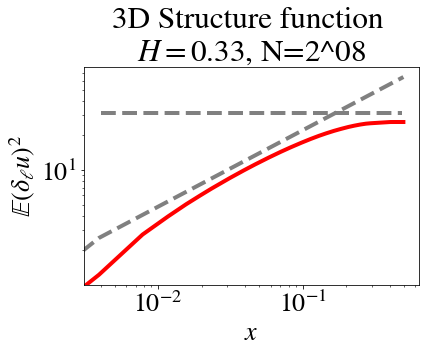

In [8]:
plt.plot( X[:N//2], c2*np.power(X[:N//2],2*H), linestyle='--' , color='gray', linewidth=4)
plt.axhline(y=2*var, xmin=0.05, xmax=0.95, color='gray', linewidth=4, linestyle='dashed')
plt.plot( X[:N//2], sf2[:N//2], color='r', linewidth=4 )
#plt.plot( X[:N//2], sf1[:N//2], color='b', linewidth=2 )
plt.title('3D Structure function \n'+'$H={:.2f}$, N=2^{:02d}'.format(H,int(np.log2(N))))
plt.ylabel(r'$\mathbb{E}(\delta_{\ell} u)^2$')
plt.xlabel(r'$x$')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [9]:
# power spectrum

In [10]:
KPairs = np.array([[[ np.sqrt(ki**2 + kj**2 + kk**2) for ki in K ] for kj in K ] for kk in K])

In [11]:
KVals = np.unique(KPairs)

In [12]:
KCount = np.array( [np.count_nonzero(KPairs == k) for k in KVals ] )

In [13]:
KIndex = np.array( [[[ np.where( KVals == KPairs[i,j,k] )[0][0] for i in range(N)] for j in range(N)] for k in range(N)])

In [14]:
Spec = np.zeros_like(KVals)

In [15]:
UF = np.fft.fftn(U2)

In [16]:
for i in range(N):
    for j in range(N):
        for k in range(N):
            Spec[KIndex[i,j,k]] += KVals[KIndex[i,j,k]]**2 * np.abs(UF[i,j,k])**2
        
for i in range(len(Spec)):
    Spec[i] = 4. * np.pi**2 * Spec[i] / KCount[i] / N**(2*dim)

KeyboardInterrupt: 

In [ ]:
del UF

$$
E = \int \hat{C}(\vec k) dS(k)
$$

$$
E_{2D} = \int k d\theta \, \hat C(\vec k)
$$

In [ ]:
# power spectrum
#plt.plot( K[:N//2], psp1[:N//2], color='b', linewidth=2 )
c3D = 4.*np.pi**2
plt.plot( KVals, Spec, color='r', linewidth=2 )
plt.plot( KVals, c3D * np.power(KVals*KVals+1.,-H-.5), linestyle='--' , color='k', linewidth=4)
plt.title('3D Power spectrum \n'+'$H={:.2f}$, N=2^{:02d}'.format(H,int(np.log2(N))))
plt.ylabel(r'Power spectrum')
plt.xlabel(r'$x$')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(14,5))

axs[0].imshow(np.real(U2[0,:,:]))
axs[0].axis('off')

# power spectrum
axs[1].plot( KVals, Spec, color='r', linewidth=2 )
axs[1].plot( KVals, c3D * np.power(KVals*KVals+1.,-H-.5), linestyle='--' , color='k', linewidth=4)
axs[1].grid(True)
axs[1].set_xlabel(r'$k$')
axs[1].set_ylabel(r'$\mathbb{E}[|\hat u|^2]$')
axs[1].set_yscale('log')
axs[1].set_xscale('log')

axs[2].plot( X[:N//2], c2*np.power(X[:N//2],2*H), linestyle='--' , color='gray', linewidth=4)
axs[2].axhline(y=2*var, xmin=0.6, xmax=0.95, color='gray', linewidth=4, linestyle='dashed')
axs[2].plot( X[:N//2], sf2[:N//2], color='r', linewidth=2 )
axs[2].grid(True)
axs[2].set_xlabel(r'$\ell$')
axs[2].set_ylabel(r'$\mathbb{E}[|\delta_{\ell} u|^2]$')
axs[2].set_yscale('log')
axs[2].set_xscale('log')

plt.tight_layout()
plt.savefig("fgf3d.png")
plt.show()